# Scikit_learn

`Try to learn from the ZTM library to refer `

> `Why scikit learn`
    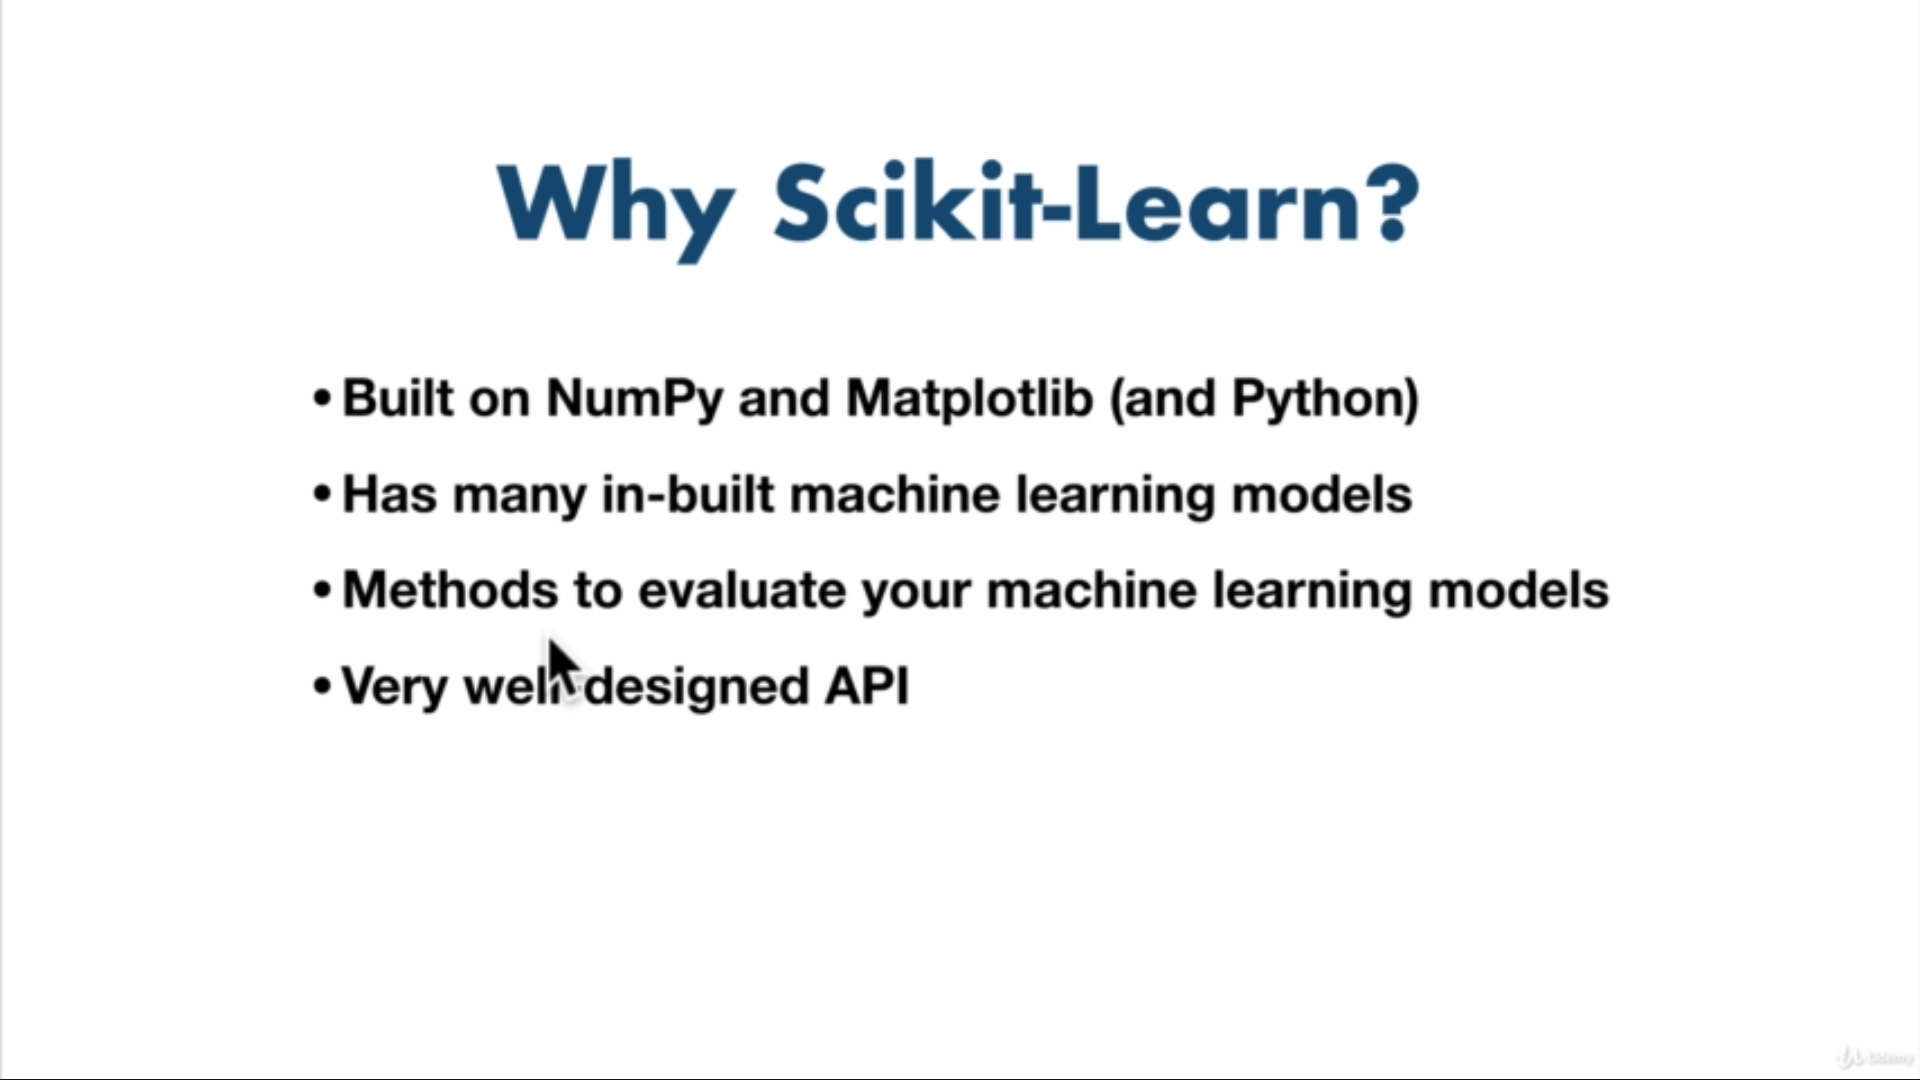

> 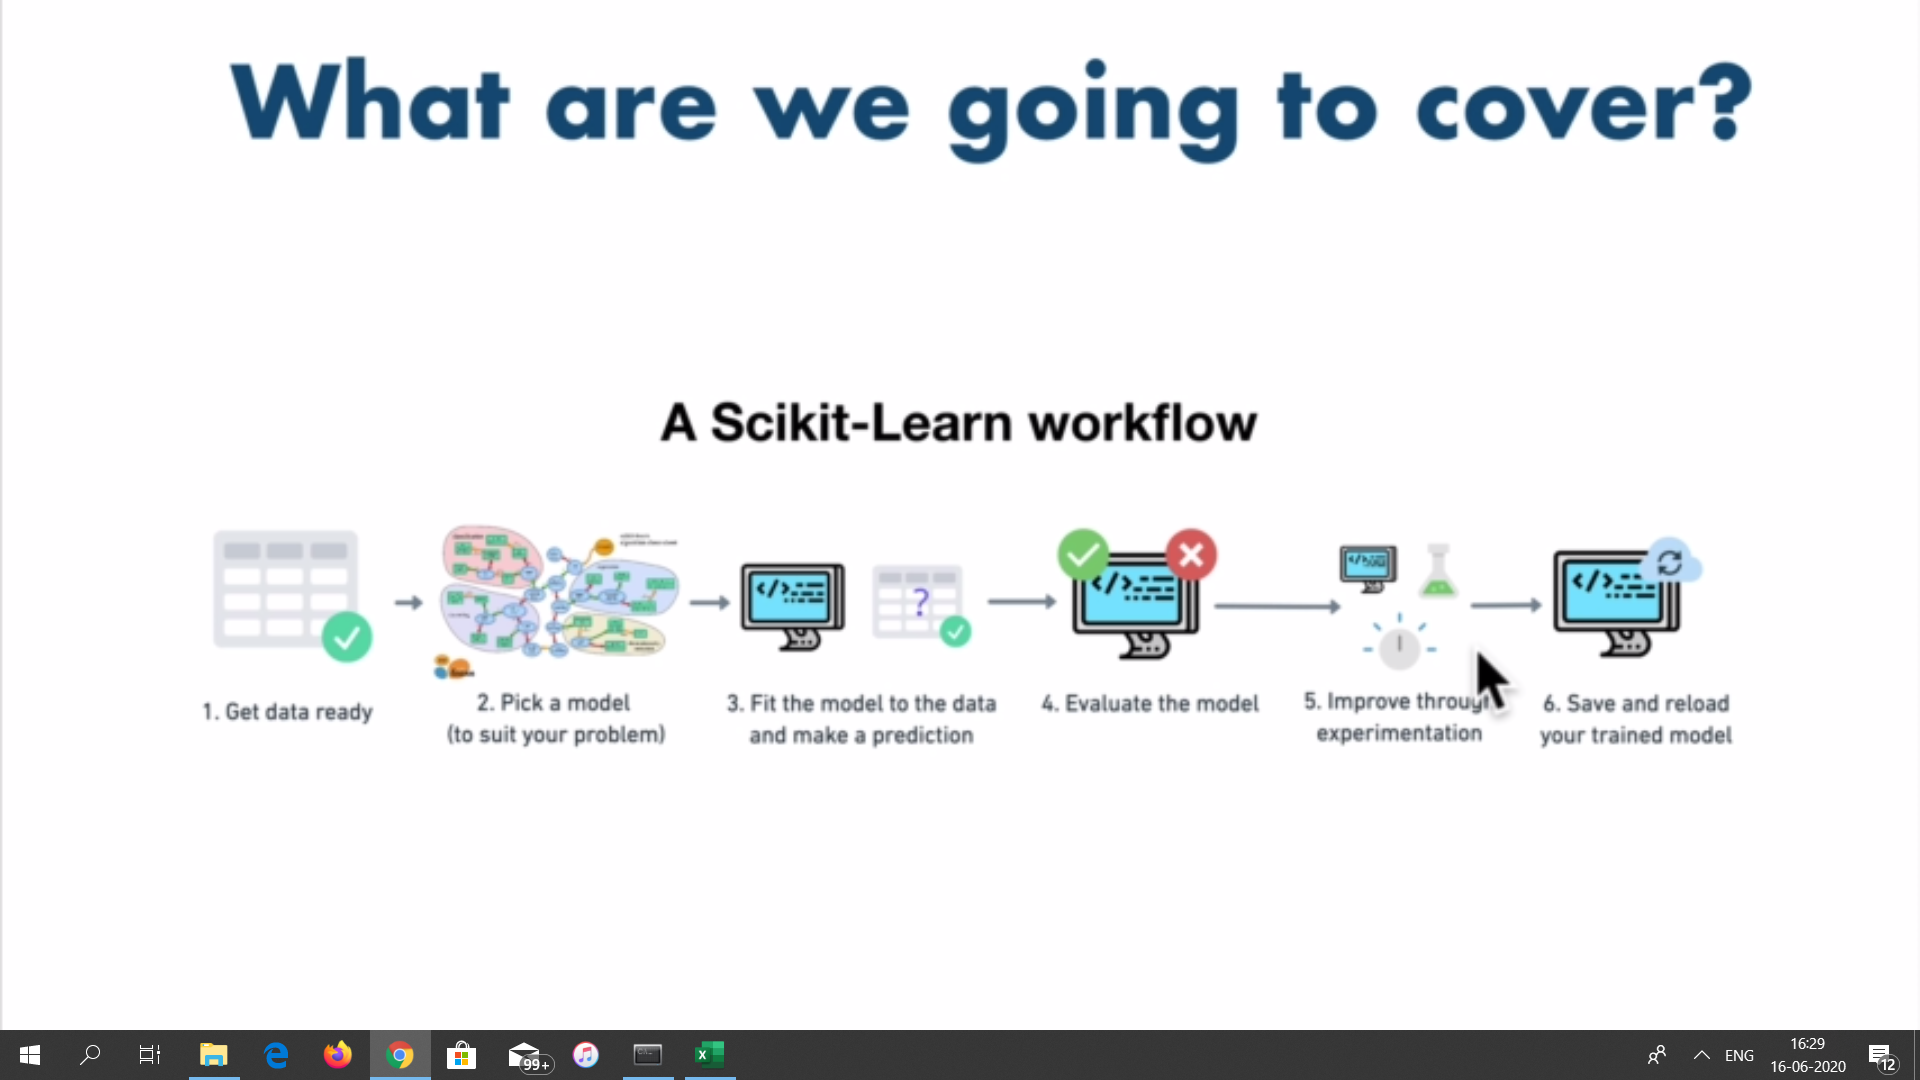

# introduction to scikit learn 

it covers with the beautiful sk learn library 

0.  An end - to -end  scikit learn workflow
1. Getting the data ready 
2. Choose the right estimator / algorithm for our problem 
3. Fit the model / algorithm to use it to make predictions on our data 
4. Evaluating a model 
5. Improve a model 
6. Save and load the training model 
7. put it all together 



## 0. AN end - to -end scikit learn workflow 


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

heart_disease = pd.read_csv(r"C:/Users/ramsu/ltphd/lecture-python-programming.notebooks/zero-to-mastery-ml/data/heart-disease.csv")

heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [11]:
# creating features ,atrix

x = heart_disease.drop(columns='target')

print(x.head())

# creating the target column 
y = heart_disease['target']
y.head()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [15]:
# 2 is to choose the right model for hyper parameters 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# well keep the defaulr parameters 

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
# fitting the model to training data 

from sklearn.model_selection import train_test_split  

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:

%timeit clf.fit(x_train,y_train);

117 ms ± 276 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
# make a prediction 

y_preds =clf.predict(x_test)

print(y_preds)

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
y_test

230    0
290    0
12     1
257    0
201    0
      ..
79     1
178    0
209    0
17     1
225    0
Name: target, Length: 61, dtype: int64

In [29]:
bool_frame = y_preds == y_test

print(bool_frame.value_counts())


True     53
False     8
Name: target, dtype: int64


In [31]:
# evaluation 
clf.score(x_train,y_train)


1.0

In [32]:
clf.score(x_test,y_test)

0.8852459016393442

In [35]:
from sklearn.metrics import classification_report ,confusion_matrix ,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.93      0.82      0.87        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [36]:
confusion_matrix(y_test,y_preds)

array([[25,  2],
       [ 6, 28]], dtype=int64)

In [37]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [40]:
# 5 Improve the Model 

# try different amount of estimators 

np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying to estimate the model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print("finallyt the score is ",f"{clf.score(x_test,y_test)*100:.2f}%")
    

Trying to estimate the model with 10 estimators
finallyt the score is  85.25%
Trying to estimate the model with 20 estimators
finallyt the score is  83.61%
Trying to estimate the model with 30 estimators
finallyt the score is  85.25%
Trying to estimate the model with 40 estimators
finallyt the score is  88.52%
Trying to estimate the model with 50 estimators
finallyt the score is  85.25%
Trying to estimate the model with 60 estimators
finallyt the score is  90.16%
Trying to estimate the model with 70 estimators
finallyt the score is  90.16%
Trying to estimate the model with 80 estimators
finallyt the score is  88.52%
Trying to estimate the model with 90 estimators
finallyt the score is  86.89%


In [44]:
# 6. save the model and load it 

import pickle 

pickle.dump(clf,open(r"random_forst_model1.pkl","wb"))

In [50]:
loaded_model = pickle.load(open("random_forst_model1.pkl",'rb'))

f"{loaded_model.score(x_test,y_test)*100 :.2f}"

'86.89'